# Fourbar Mechanism Position, Velocity, and Accleration Vector Solver     
    Written By: Matt Ryan Liqua
    Written: 3/13/25
    Last Updated: 3/15/25
    Repo: https://github.com/MLiqua/FourBarPostion

In [1]:
# Inputs
# ';' At end supresses output
# TO DO: Make it all in standard SI units (m)
println("This calculation assumes ground is d [R1] \n")
print("Input a [R2] length: ") 
a = parse(Float64, readline())

print("Input b [R3] length: ") 
b = parse(Float64, readline())

print("Input c [R4] length: ") 
c = parse(Float64, readline())

print("Input a [R1] length: ") 
d = parse(Float64, readline())

print("Input Theta2 (degree): ") 
Theta2 = parse(Float64, readline())
RadTheta2 = deg2rad(Theta2)

print("Input Omega2 (rad/s): ") 
Omega2 = parse(Float64, readline())

print("Input Alpha2 (rad/s^2): ") 
Alpha2 = parse(Float64, readline())
;

This calculation assumes ground is d [R1] 

Input a [R2] length: stdin> 2
Input b [R3] length: stdin> 7
Input c [R4] length: stdin> 9
Input a [R1] length: stdin> 6
Input Theta2 (degree): stdin> 30
Input Omega2 (rad/s): stdin> 10
Input Alpha2 (rad/s^2): stdin> -5


In [2]:
# Check these values
K1 = d / a
K2 = d / c
K3 = ( (a^2) - (b^2) + (c^2) + (d^2) ) / (2 * a * c)

A = cos(RadTheta2) - K1 - (K2*cos(RadTheta2)) + K3
B = -2*sin(RadTheta2)
C = K1 - (K2 + 1)*cos(RadTheta2) + K3
;

In [3]:
# Calculating Theta 4_1 & Theta4_2
TopPart = -B + sqrt( (B^2) - (4*A*C)  )
BotPart = 2*A
RadTheta4_1 = 2*atan(TopPart / BotPart)
DegTheta4_1 = rad2deg(RadTheta4_1)

TopPart = -B - sqrt( (B^2) - (4*A*C)  )
BotPart = 2*A
RadTheta4_2 = 2*atan(TopPart / BotPart)
DegTheta4_2 = rad2deg(RadTheta4_2)
;

In [4]:
K4 = d / b
K5 = ( (c^2) - (d^2) - (a^2) - (b^2) ) / (2*a*b)

D = cos(RadTheta2) - K1 + K4*cos(RadTheta2) + K5
E = -2*sin(RadTheta2)
F = K1 + (K4 - 1)*cos(RadTheta2) + K5
;

In [5]:
# Calc Theta3_1 & Theta3_2
TopPart = -E + sqrt( (E^2) - (4*D*F)  )
BotPart = 2*D
RadTheta3_1 = 2*atan(TopPart / BotPart)
DegTheta3_1 = rad2deg(RadTheta3_1)

TopPart = -E - sqrt( (E^2) - (4*D*F)  )
BotPart = 2*D
RadTheta3_2 = 2*atan(TopPart / BotPart)
DegTheta3_2 = rad2deg(RadTheta3_2)
;

In [6]:
# Calc Omega4_1 & Omega4_2
FracTop = a*Omega2*sin(RadTheta2 - RadTheta3_1)
FracBot = c*sin(RadTheta4_1 - RadTheta3_1)
Omega4_1 = FracTop / FracBot

FracTop = a*Omega2*sin(RadTheta2 - RadTheta3_2)
FracBot = c*sin(RadTheta4_2 - RadTheta3_2)
Omega4_2 = FracTop / FracBot
;

In [8]:
# Calc Omega3_1 & Omega3_2
FracTop = a * Omega2 * sin(RadTheta4_1 - RadTheta2)
FracBot = b * sin(RadTheta3_1 - RadTheta4_1)
Omega3_1 = FracTop / FracBot

FracTop = a * Omega2 * sin(RadTheta4_2 - RadTheta2)
FracBot = b * sin(RadTheta3_2 - RadTheta4_2)
Omega3_2 = FracTop / FracBot
;

In [9]:
A_2_1 = c*sin(RadTheta4_1)
B_2_1 = b*sin(RadTheta3_1)
C_2_1 = a*Alpha2*sin(RadTheta2) + a*(Omega2^2)*cos(RadTheta2) + b*(Omega3_1^2)*cos(RadTheta3_1) - c*(Omega4_1^2)*cos(RadTheta4_1)
D_2_1 = c*cos(RadTheta4_1)
E_2_1 = b*cos(RadTheta3_1)
F_2_1 = a*(Alpha2)*cos(RadTheta2) - a*(Omega2^2)*sin(RadTheta2) - b*(Omega3_1^2)*sin(RadTheta3_1) + c*(Omega4_1^2)*sin(RadTheta4_1)


A_2_2 = c * sin(RadTheta4_2)
B_2_2 = b * sin(RadTheta3_2)
C_2_2 = a * Alpha2 * sin(RadTheta2) + a * (Omega2^2) * cos(RadTheta2) + b * (Omega3_2^2) * cos(RadTheta3_2) - c * (Omega4_2^2) * cos(RadTheta4_2)
D_2_2 = c * cos(RadTheta4_2)
E_2_2 = b * cos(RadTheta3_2)
F_2_2 = a * (Alpha2) * cos(RadTheta2) - a * (Omega2^2) * sin(RadTheta2) - b * (Omega3_2^2) * sin(RadTheta3_2) + c * (Omega4_2^2) * sin(RadTheta4_2)
;

In [10]:
# Calc Alpha3_1 & Alpha3_2
FracTop = (C_2_1*D_2_1) - (A_2_1*F_2_1)
FracBot = (A_2_1*E_2_1) - (B_2_1*D_2_1)
Alpha3_1 = FracTop / FracBot

FracTop = (C_2_2 * D_2_2) - A_2_2* (F_2_2)
FracBot = (A_2_2 * E_2_2) - (B_2_2 * D_2_2)
Alpha3_2 = FracTop / FracBot
;

In [11]:
# Calc Alpha4_1 & Alpha4_2
FracTop = (C_2_1 * E_2_1) - (B_2_1 * F_2_1)
FracBot = (A_2_1 * E_2_1) - (B_2_1 * D_2_1)
Alpha4_1 = FracTop / FracBot

FracTop = (C_2_2 * E_2_2) - (B_2_2 * F_2_2)
FracBot = (A_2_2 * E_2_2) - (B_2_2 * D_2_2)
Alpha4_2 = FracTop / FracBot
;

In [12]:
function DegSolve(xr,yi)
        if (xr > 0) && (yi > 0)
            Rad = atan(yi / xr)
            Deg = rad2deg(Rad)
            return(Deg)
        elseif (xr > 0) && (yi < 0)
            Rad = atan(yi / xr)
            Deg = rad2deg(Rad)
            return(Deg)
        elseif (xr < 0) && (yi > 0)
            Rad = atan(yi / xr) + pi
            Deg = rad2deg(Rad)
            return(Deg)
        else
            Rad = atan(yi / xr) + pi
            Deg = rad2deg(Rad)
            return(Deg)
        end
end
;

In [13]:
# Velocity A Vector
using LinearAlgebra

Va_R = a * Omega2 * -sin(RadTheta2) 
Va_I = a * Omega2 * cos(RadTheta2)
Va_Vect = Va_R + Va_I*im # 'im' means imaginary
Va_Mag =  norm(Va_Vect)
Va_Deg = DegSolve(Va_R,Va_I)
Va_Rad = deg2rad(Va_Deg)
;

In [14]:
# Velcoity Vba Vector
Vba_R_1 = b * Omega3_1 * -sin(RadTheta3_1)
Vba_I_1 = b * Omega3_1 * cos(RadTheta3_1)
Vba_Vect_1 = Vba_R_1 + Vba_I_1*im
Vba_Mag_1 =  norm(Vba_Vect_1)
Vba_Deg_1 = DegSolve(Vba_R_1,Vba_I_1)
Vba_Rad_1 = deg2rad(Vba_Deg_1)

Vba_R_2 = b * Omega3_2 * -sin(RadTheta3_2)
Vba_I_2 = b * Omega3_2 * cos(RadTheta3_2)
Vba_Vect_2 = Vba_R_2 + Vba_I_2*im
Vba_Mag_2 =  norm(Vba_Vect_2)
Vba_Deg_2 = DegSolve(Vba_R_2,Vba_I_2)
Vba_Rad_2 = deg2rad(Vba_Deg_2)
;

In [15]:
# Velocity Vb Vector
Vb_R_1 = c * Omega4_1 * -sin(RadTheta4_1)
Vb_I_1 = c * Omega4_1 * cos(RadTheta4_1)
Vb_Vect_1 = Vb_R_1 + Vb_I_1*im
Vb_Mag_1 =  norm(Vb_Vect_1)
Vb_Deg_1 = DegSolve(Vb_R_1,Vb_I_1)
Vb_Rad_1 = deg2rad(Vb_Deg_1)

Vb_R_2 = c * Omega4_2 * -sin(RadTheta4_2)
Vb_I_2 = c * Omega4_2 * cos(RadTheta4_2)
Vb_Vect_2 = Vb_R_2 + Vb_I_2*im
Vb_Mag_2 =  norm(Vb_Vect_2)
Vb_Deg_2 = DegSolve(Vb_R_2,Vb_I_2)
Vb_Rad_2 = deg2rad(Vb_Deg_2)
;

In [16]:
# Accleration V_A vector
# There exists both normal and tangental components
# j(alpha)(R) is tangental
# -(omega)^2(R) is normal comp
Va_Acel_R = -a*(Alpha2)*sin(RadTheta2) - a*(Omega2^2)*cos(RadTheta2)
Va_Acel_I = a*(Alpha2)*cos(RadTheta2) - a*(Omega2^2)*sin(RadTheta2)
Va_Acel_Vect_1 = Va_Acel_R + Va_Acel_I*im
Va_Acel_Mag_1 =  norm(Vb_Vect_1)
Va_Acel_Deg_1 = DegSolve(Va_Acel_R, Va_Acel_I)
Va_Acel_Rad_1 = deg2rad(Va_Acel_Deg_1)
;

In [17]:
# Accleration V_BA Vector
Vba_Acel_R_1 = -b*Alpha3_1*sin(RadTheta3_1) - b*(Omega3_1^2)*cos(RadTheta3_1)
Vba_Acel_I_1 = b*Alpha3_1*cos(RadTheta3_1) - b*(Omega3_1^2)*sin(RadTheta3_1) 
Vba_Acel_Vect_1 = Vba_Acel_R_1 + Vba_Acel_I_1*im
Vba_Acel_Mag_1 =  norm(Vba_Vect_1)
Vba_Acel_Deg_1 = DegSolve(Vba_Acel_R_1, Vba_Acel_I_1)
Vba_Acel_Rad_1 = deg2rad(Vba_Acel_Deg_1)

Vba_Acel_R_2 = -b*Alpha3_2*sin(RadTheta3_2) - b*(Omega3_2^2)*cos(RadTheta3_2)
Vba_Acel_I_2 = b*Alpha3_2*cos(RadTheta3_2) - b*(Omega3_2^2)*sin(RadTheta3_2)
Vba_Acel_Vect_2 = Vba_Acel_R_2 + Vba_Acel_I_2*im
Vba_Acel_Mag_2 =  norm(Vba_Vect_2)
Vba_Acel_Deg_2 = DegSolve(Vba_Acel_R_2, Vba_Acel_I_2)
Vba_Acel_Rad_2 = deg2rad(Vba_Acel_Deg_2)
;

In [18]:
# Accleration V_B Vector
Vb_Acel_R_1 = -c*(Alpha4_1)*sin(RadTheta4_1) - c*(Omega4_1^2)*cos(RadTheta4_1)
Vb_Acel_I_1 =  c*(Alpha4_1)*cos(RadTheta4_1) - c*(Omega4_1^2)*sin(RadTheta4_1)
Vb_Acel_Vect_1 = Vb_Acel_R_1 + Vb_Acel_I_1*im
Vb_Acel_Mag_1 =  norm(Vba_Vect_2)
Vb_Acel_Deg_1 = DegSolve(Vba_Acel_R_1, Vba_Acel_I_1)
Vb_Acel_Rad_1 = deg2rad(Vb_Acel_Deg_1)

Vb_Acel_R_2 = -c*(Alpha4_2)*sin(RadTheta4_2) - c*(Omega4_2^2)*cos(RadTheta4_2)
Vb_Acel_I_2 =  c*(Alpha4_2)*cos(RadTheta4_2) - c*(Omega4_2^2)*sin(RadTheta4_2)
Vb_Acel_Vect_2 = Vb_Acel_R_2 + Vb_Acel_I_2*im
Vb_Acel_Mag_2 =  norm(Vb_Vect_2)
Vb_Acel_Deg_2 = DegSolve(Vba_Acel_R_2, Vba_Acel_I_2)
Vb_Acel_Rad_2 = deg2rad(Vb_Acel_Deg_2)
;

In [19]:
# Outputs Block
using Base
printstyled("These are the circuits: \n", bold = true)
printstyled("Circuit One","\t\tCircuit Two\n", underline =true)
println("Theta3_1: ", round(DegTheta3_1, digits =2), "\tTheta3_2: ", round(DegTheta3_2, digits = 2))
println("Theta4_1: ", round(DegTheta4_1, digits =2), "\tTheta4_2: ", round(DegTheta4_2, digits = 2))
println("Omega3_1: ", round(Omega3_1, digits =2), "\t\tOmega3_2: ", round(Omega3_2, digits = 2))
println("Omega4_1: ", round(Omega4_1, digits =2), "\t\tOmega4_2: ", round(Omega4_2, digits = 2))
println("Alpha3_1: ", round(Alpha3_1, digits =2), "\t\tAlpha3_2: ", round(Alpha3_2, digits = 2))
println("Alpha4_1: ", round(Alpha4_1, digits =2), "\t\tAlpha4_2: ", round(Alpha4_2, digits = 2))
print("\n")

printstyled("These are the velocity vectors: \n", bold = true)
println("Va_Vect: ", round(Va_Vect, digits =2), "\n Va_Mag: ", round(Va_Mag, digits = 2), "\n Va_Deg: ", round(Va_Deg, digits = 2), "\n")
println("Vba_Vect_1: ", round(Vba_Vect_1, digits =2), "\n Vba_Mag_1: ", round(Vba_Mag_1, digits = 2), "\n Vba_Deg_1: ", round(Vba_Deg_1, digits = 2), "\n")
println("Vba_Vect_2: ", round(Vba_Vect_2, digits =2), "\n Vba_Mag_2: ", round(Vba_Mag_2, digits = 2), "\n Vba_Deg_2: ", round(Vba_Deg_2, digits = 2), "\n")
println("Vb_Vect_1: ", round(Vb_Vect_1, digits =2), "\n Vb_Mag_1: ", round(Vb_Mag_1, digits = 2), "\n Vb_Deg_1: ", round(Vb_Deg_1, digits = 2), "\n")
println("Vb_Vect_2: ", round(Vb_Vect_2, digits =2), "\n Vb_Mag_2: ", round(Vb_Mag_2, digits = 2), "\n Vb_Deg_2: ", round(Vb_Deg_2, digits = 2), "\n")

printstyled("These are the acceleration vectors: \n" , bold = true)
println("Va_Acel_Vect_1: ", round(Va_Acel_Vect_1, digits =2), "\n Va_Acel_Mag_1: ", round(Va_Acel_Mag_1, digits = 2), "\n Va_Acel_Deg_1: ", round(Va_Acel_Deg_1, digits = 2), "\n")
println("Vba_Acel_Vect_1: ", round(Vba_Acel_Vect_1, digits =2), "\n Vba_Acel_Mag_1: ", round(Vba_Acel_Mag_1, digits = 2), "\n Vba_Acel_Deg_1: ", round(Vba_Acel_Deg_1, digits = 2), "\n")
println("Vba_Acel_Vect_2: ", round(Vba_Acel_Vect_2, digits =2), "\n Vba_Acel_Mag_2: ", round(Vba_Acel_Mag_2, digits = 2), "\n Vba_Acel_Deg_2: ", round(Vba_Acel_Deg_2, digits = 2), "\n")
println("Vb_Acel_Vect_1: ", round(Vb_Acel_Vect_1, digits =2), "\n Vb_Acel_Mag_1: ", round(Vb_Acel_Mag_1, digits = 2), "\n Vb_Acel_Deg_1: ", round(Vb_Acel_Deg_1, digits = 2), "\n")
println("Vb_Acel_Vect_2: ", round(Vb_Acel_Vect_2, digits =2), "\n Vb_Acel_Mag_2: ", round(Vb_Acel_Mag_2, digits = 2), "\n Vb_Acel_Deg_2: ", round(Vb_Acel_Deg_2, digits = 2), "\n")
;

These are the circuits: 
Circuit One		Circuit Two
Theta3_1: -115.21	Theta3_2: 88.84
Theta4_1: -143.66	Theta4_2: 117.29
Omega3_1: -0.66		Omega3_2: -5.99
Omega4_1: -2.66		Omega4_2: -3.99
Alpha3_1: 78.25		Alpha3_2: 29.08
Alpha4_1: 52.0		Alpha4_2: 55.33

These are the velocity vectors: 
Va_Vect: -10.0 + 17.32im
 Va_Mag: 20.0
 Va_Deg: 120.0

Vba_Vect_1: -4.19 + 1.97im
 Vba_Mag_1: 4.64
 Vba_Deg_1: 154.79

Vba_Vect_2: 41.93 - 0.85im
 Vba_Mag_2: 41.94
 Vba_Deg_2: -1.16

Vb_Vect_1: -14.19 + 19.3im
 Vb_Mag_1: 23.95
 Vb_Deg_1: 126.34

Vb_Vect_2: 31.93 + 16.47im
 Vb_Mag_2: 35.93
 Vb_Deg_2: 27.29

These are the acceleration vectors: 
Va_Acel_Vect_1: -168.21 - 108.66im
 Va_Acel_Mag_1: 23.95
 Va_Acel_Deg_1: 212.86

Vba_Acel_Vect_1: 496.89 - 230.54im
 Vba_Acel_Mag_1: 4.64
 Vba_Acel_Deg_1: -24.89

Vba_Acel_Vect_2: -208.58 - 247.06im
 Vba_Acel_Mag_2: 41.94
 Vba_Acel_Deg_2: 229.83

Vb_Acel_Vect_1: 328.68 - 339.2im
 Vb_Acel_Mag_1: 41.94
 Vb_Acel_Deg_1: -24.89

Vb_Acel_Vect_2: -376.79 - 355.72im
 Vb_Acel_M

In [20]:
# Calculations Of Postion Vectors
# x = rcos(theta)
# y = rsin(theta)
R1_x = d * cos(0) 
R1_y = d * sin(0)

R2_x = a * cos(RadTheta2)
R2_y = a * sin(RadTheta2)

R3_x_1 = b * cos(RadTheta3_1)
R3_y_1 = b * sin(RadTheta3_1)
R3_x_2 = b * cos(RadTheta3_2)
R3_y_2 = b * sin(RadTheta3_2)

R4_x_1 = c * cos(RadTheta4_1)
R4_y_1 = c * sin(RadTheta4_1)
R4_x_2 = c * cos(RadTheta4_2)
R4_y_2 = c * sin(RadTheta4_2)

;

In [21]:
# Creating Velcoity Vectors
Va_x = Va_Mag * cos(Va_Rad)
Va_y = Va_Mag * sin(Va_Rad)

Vba_x_1 = Vba_Mag_1 * cos(Vba_Rad_1)
Vba_y_1 = Vba_Mag_1 * sin(Vba_Rad_1)
Vba_x_2 = Vba_Mag_2 * cos(Vba_Rad_2)
Vba_y_2 = Vba_Mag_2 * sin(Vba_Rad_2)

Vb_x_1 = Vb_Mag_1 * cos(Vb_Rad_1)
Vb_y_1 = Vb_Mag_1 * sin(Vb_Rad_1)
Vb_x_2 = Vb_Mag_2 * cos(Vb_Rad_2)
Vb_y_2 = Vb_Mag_2 * sin(Vb_Rad_2)
#print(Va_Deg, Vba_Deg_1, Vb_Deg_1)
;

In [22]:
# Creating Acceleration Vectors
Va_Acel_x = Va_Acel_Mag_1*cos(Va_Acel_Rad_1)
Va_Acel_y = Va_Acel_Mag_1*sin(Va_Acel_Rad_1)

Vba_Acel_x_1 = Vba_Acel_Mag_1 * cos(Vba_Acel_Rad_1)
Vba_Acel_y_1 = Vba_Acel_Mag_1 * sin(Vba_Acel_Rad_1)
Vba_Acel_x_2 = Vba_Acel_Mag_2 * cos(Vba_Acel_Rad_2)
Vba_Acel_y_2 = Vba_Acel_Mag_2 * sin(Vba_Acel_Rad_2)

Vb_Acel_x_1 = Vb_Acel_Mag_1 * cos(Vb_Acel_Rad_1)
Vb_Acel_y_1 = Vb_Acel_Mag_1 * sin(Vb_Acel_Rad_1)
Vb_Acel_x_2 = Vb_Acel_Mag_2 * cos(Vb_Acel_Rad_2)
Vb_Acel_y_2 = Vb_Acel_Mag_2 * sin(Vb_Acel_Rad_2)
;

In [24]:
# Adding needed Packages
using Pkg
#Pkg.agg("Interact")
Pkg.add("WebIO")
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


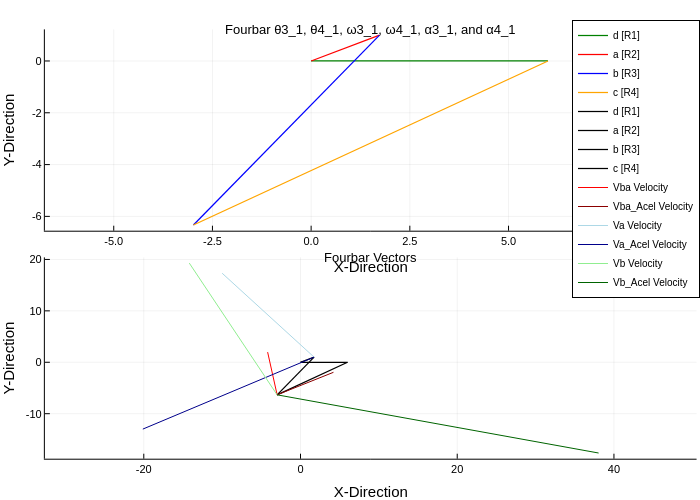

In [34]:
# Graph Of Circuit 1
# BE VERY MINDFUL OF HOW THE VECTORS ARE DEFINED
using Plots

plotlyjs()

Fourbar_P1 = Plots.plot( [0, R1_x], [0, R1_y], arrow = true, label = "d [R1]", color = "green", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar θ3_1, θ4_1, ω3_1, ω4_1, α3_1, and α4_1",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "red", linewidth =1.25)
Plots.plot!([R2_x, R3_x_1], [R2_y, R3_y_1], arrow = true, label = "b [R3]", color = "blue", linewidth =1.25)
Plots.plot!([R1_x, R3_x_1], [R1_y, R3_y_1], arrow = true, label = "c [R4]", color = "orange", linewidth =1.25)

Fourbar_Vectors_P1 = Plots.plot( [0, R1_x], [0, R1_y], arrow = true, label = "d [R1]", color = "black", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar Vectors",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "black", linewidth =1.25) # R2
Plots.plot!([R2_x, R3_x_1], [R2_y, R3_y_1], arrow = true, label = "b [R3]", color = "black", linewidth =1.25) # R3
Plots.plot!([R1_x, R3_x_1], [R1_y, R3_y_1], arrow = true, label = "c [R4]", color = "black", linewidth =1.25) # R4

Plots.plot!( [R3_x_1, Vba_x_1 ], [R3_y_1, Vba_y_1], arrow = true, label = "Vba Velocity", color = "red")
Plots.plot!( [R3_x_1, Vba_Acel_x_1], [R3_y_1, Vba_Acel_y_1 ], arrow = true, label = "Vba_Acel Velocity", color = "dark red")

Plots.plot!( [R2_x, Va_x], [R2_y, Va_y], arrow = true, label = "Va Velocity", color = "light blue")
Plots.plot!( [R2_x, Va_Acel_x], [R2_y, Va_Acel_y ], arrow = true, label = "Va_Acel Velocity", color = "dark blue")

Plots.plot!( [R3_x_1, Vb_x_1 ], [R3_y_1, Vb_y_1], arrow = true, label = "Vb Velocity", color = "light green")
Plots.plot!( [R3_x_1, Vb_Acel_x_1], [R3_y_1, Vb_Acel_y_1 ], arrow = true, label = "Vb_Acel Velocity", color = "dark green")

plot(Fourbar_P1, Fourbar_Vectors_P1, layout = (2,1), legend = true, size = (800,800))

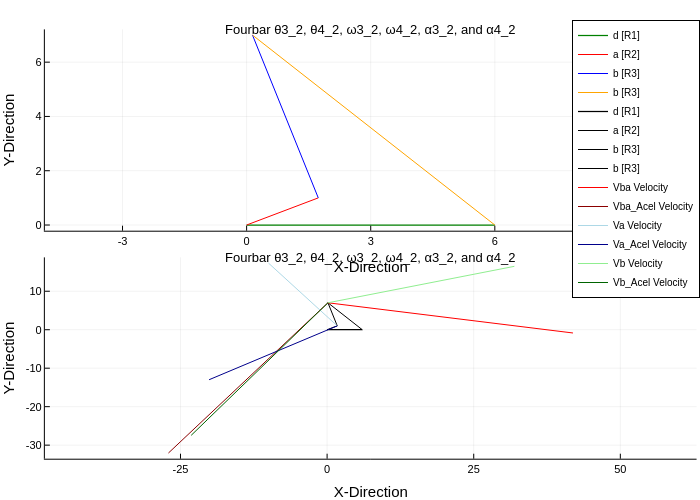

In [35]:
## Graph Circuit Two

plotlyjs()
Fourbar_P1 = Plots.plot( [0, R1_x], [0, R1_y], arrow = true, label = "d [R1]", color = "green", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar θ3_2, θ4_2, ω3_2, ω4_2, α3_2, and α4_2",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "red")
Plots.plot!([R2_x, R3_x_2], [R2_y, R3_y_2], arrow = true, label = "b [R3]", color = "blue")
Plots.plot!([R1_x, R3_x_2], [R1_y, R3_y_2], arrow = true, label = "b [R3]", color = "orange")

Fourbar_Vectors_P1 = Plots.plot( [0, R1_x], [0, R1_y], arrow = true, label = "d [R1]", color = "black", linewidth =1.25,
    thickness_scaling = 1.15,
    autosize = true,
    xlabel = "X-Direction", 
    ylabel = "Y-Direction", 
    title = "Fourbar θ3_2, θ4_2, ω3_2, ω4_2, α3_2, and α4_2",
    titlefontsize=9,
    aspect_ratio = :equal,
    legendfontsize=7,
    legend=:topright
)
Plots.plot!([0, R2_x], [0, R2_y], arrow = true, label = "a [R2]", color = "black")
Plots.plot!([R2_x, R3_x_2], [R2_y, R3_y_2], arrow = true, label = "b [R3]", color = "black")
Plots.plot!([R1_x, R3_x_2], [R1_y, R3_y_2], arrow = true, label = "b [R3]", color = "black")

Plots.plot!( [R3_x_2, Vba_x_2 ], [R3_y_2, Vba_y_2], arrow = true, label = "Vba Velocity", color = "red")
Plots.plot!( [R3_x_2, Vba_Acel_x_2], [R3_y_2, Vba_Acel_y_2 ], arrow = true, label = "Vba_Acel Velocity", color = "dark red")

Plots.plot!( [R2_x, Va_x], [R2_y, Va_y], arrow = true, label = "Va Velocity", color = "light blue")
Plots.plot!( [R2_x, Va_Acel_x], [R2_y, Va_Acel_y ], arrow = true, label = "Va_Acel Velocity", color = "dark blue")

Plots.plot!( [R3_x_2, Vb_x_2 ], [R3_y_2, Vb_y_2], arrow = true, label = "Vb Velocity", color = "light green")
Plots.plot!( [R3_x_2, Vb_Acel_x_2], [R3_y_2, Vb_Acel_y_2 ], arrow = true, label = "Vb_Acel Velocity", color = "dark green")

plot(Fourbar_P1, Fourbar_Vectors_P1, layout = (2,1), legend = true, size = (800,800))